In [2]:
import sys
sys.path.append('C:\Program Files\Python38\Lib\site-packages')

In [3]:
sys.path.append(r'C:\Users\Yasin Orta\AppData\Roaming\Python\Python38\site-packages')

In [4]:
import cv2
from matplotlib import pyplot as plt
import os
import numpy as np
import tensorflow as tf
import imghdr

In [6]:
data_dir = 'data'

In [7]:
os.listdir(data_dir)

['happy', 'redBrickData']

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 193 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [17]:
batch[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

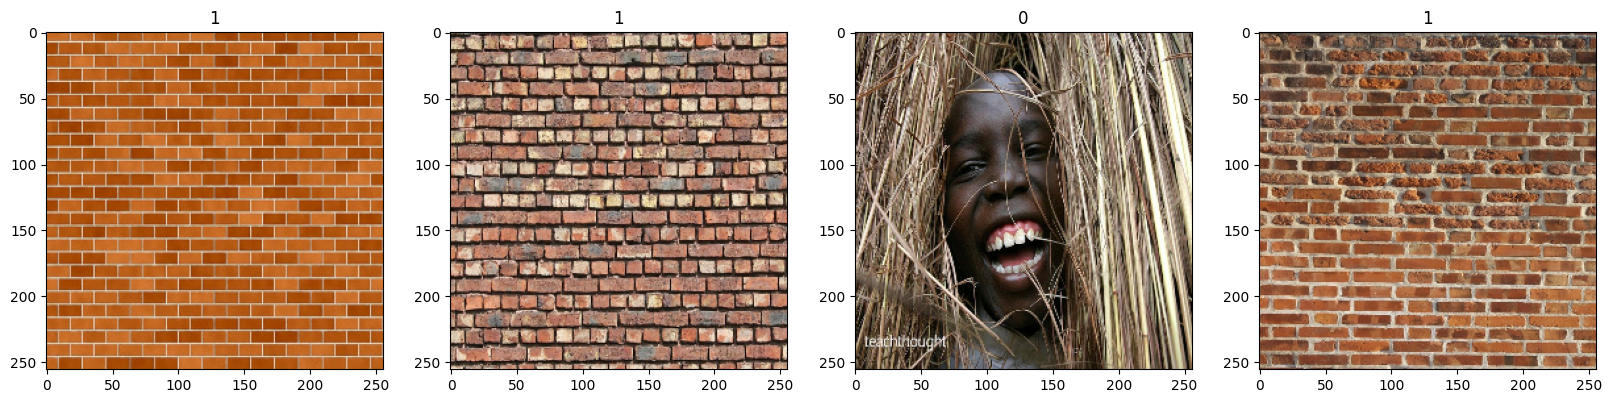

In [19]:
# Class 1 equals brick 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [62]:
len(data)

7

In [63]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [64]:
print(f'train_size: {train_size}, val_size: {val_size}, test_Size: {test_size}')

train_size: 4, val_size: 2, test_Size: 1


In [65]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [66]:
len(test)

1

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [68]:
model = Sequential()

In [69]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [72]:
logdir='logs'

In [73]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [74]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 7s 1s/step - loss: 0.7766 - accuracy: 0.4531 - val_loss: 0.5724 - val_accuracy: 0.5938
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.5620 - accuracy: 0.8516 - val_loss: 0.4703 - val_accuracy: 0.9531
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.3466 - accuracy: 0.9375 - val_loss: 0.2786 - val_accuracy: 0.8906
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.3708 - accuracy: 0.8750 - val_loss: 0.0908 - val_accuracy: 0.9688
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.1652 - accuracy: 0.9375 - val_loss: 0.0979 - val_accuracy: 0.9688
Epoch 6/20
4/4 [==============================] - 6s 1s/step - loss: 0.1292 - accuracy: 0.9531 - val_loss: 0.1335 - val_accuracy: 0.9531
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.1572 - accuracy: 0.9453 - val_loss: 0.0783 - val_accuracy: 0.9844
Epoch 8/20
4/4 [=========================

In [84]:
hist.history

{'loss': [0.776560366153717,
  0.5619703531265259,
  0.34655311703681946,
  0.3708081841468811,
  0.16523796319961548,
  0.12915265560150146,
  0.1571822166442871,
  0.06734948605298996,
  0.12391304969787598,
  0.135333850979805,
  0.09933660924434662,
  0.01879308745265007,
  0.026833603158593178,
  0.01827671006321907,
  0.010046135634183884,
  0.01596507802605629,
  0.0159273911267519,
  0.013113830238580704,
  0.010246671736240387,
  0.0056832535192370415],
 'accuracy': [0.453125,
  0.8515625,
  0.9375,
  0.875,
  0.9375,
  0.953125,
  0.9453125,
  0.96875,
  0.96875,
  0.96875,
  0.9609375,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9921875,
  1.0,
  0.9921875,
  0.9921875,
  1.0],
 'val_loss': [0.5724475383758545,
  0.47027814388275146,
  0.27856266498565674,
  0.09079531580209732,
  0.09792180359363556,
  0.1334778070449829,
  0.07834597676992416,
  0.16038373112678528,
  0.018184565007686615,
  0.15701401233673096,
  0.012387106195092201,
  0.014359375461935997,
  0.01867203786969185,
  

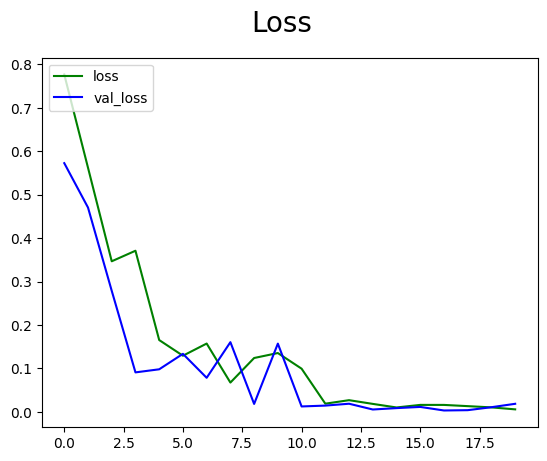

In [85]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

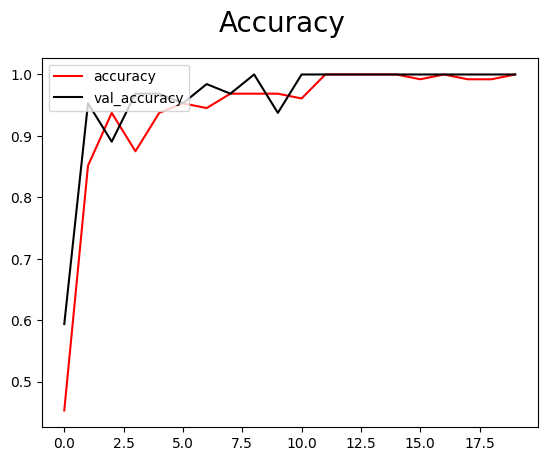

In [86]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='black', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [87]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [88]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [91]:
print(f'test: {len(test)}, train: {len(train)}, val: {len(val)}')

test: 1, train: 4, val: 2


In [92]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 30ms/step


In [93]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


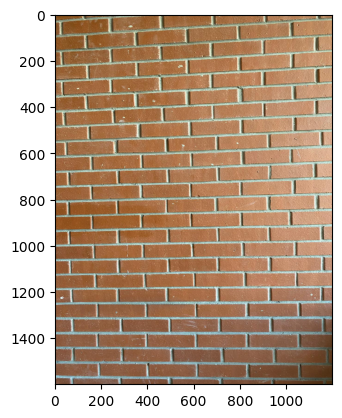

In [122]:
img = cv2.imread('test.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

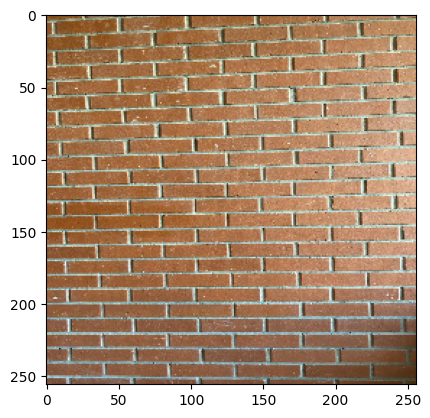

In [123]:
resize = tf.image.resize(rgb_img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [124]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 28ms/step


In [125]:
yhat

array([[0.9905463]], dtype=float32)

In [126]:
if yhat > 0.5:
    print(f'Predicted class is Brick')
else:
    print(f'Predicted class is NOT Brick')

Predicted class is Brick


In [ ]:
# Saving the model for later use

In [128]:
from tensorflow.keras.models import load_model

In [129]:
model.save(os.path.join('models','brickModel.h5'))

C:\Program Files\Python38\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [130]:
new_model = load_model(os.path.join('models','brickModel.h5'))

In [ ]:
img_new = cv2.imread('sw.jpg')
rgb_img_new = cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img_new)
plt.show()

In [ ]:
resize_new = tf.image.resize(rgb_img_new, (256,256))
plt.imshow(resize_new.numpy().astype(int))
plt.show()

In [131]:
new_model.predict(np.expand_dims(resize_new/255,0))

1/1 [==============================] - 0s 191ms/step


array([[0.9905463]], dtype=float32)

In [132]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 87ms/step


In [133]:
if yhatnew > 0.5:
    print(f'Predicted class is Brick')
else:
    print(f'Predicted class is NOT Brick')

Predicted class is Brick
